In [1]:
# import required libraries.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import glob

In [2]:
# we have images which the three channels are concatenated vertically.
# Read 8-bit color images.
# insert the images a list.
images = []
for i in glob.glob("images/*.jpg"):
    img= cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    images.append(img)

displacements from G to B for each images: [[-2, 1]]
displacements from R to B for each images: [[3, 1]]


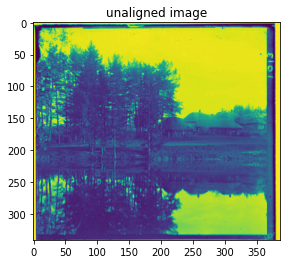

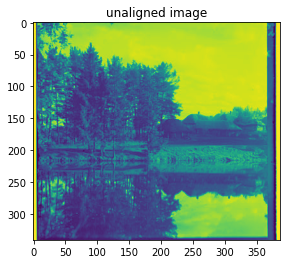

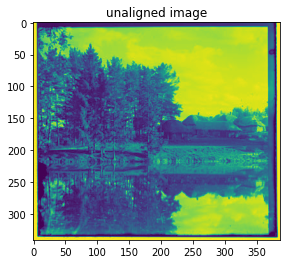

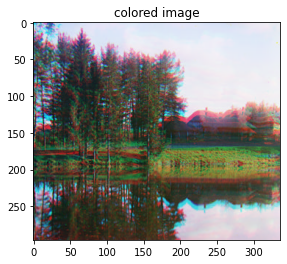

In [3]:
align_matrix_listg = []
align_matrix_listr = []
edge = 0.065
# loop established to execute operations for each image.
for img in images:
    # for finding the width and height of the color image used np.floor
    height = int(np.floor(img.shape[0] / 3.0))
    width = int(np.floor(img.shape[1]))
    
    #Divide the input image into three equal parts corresponding to RGB channels.
    bgr = np.zeros((height,width, 3), dtype= np.uint8 )
    
    for i in range(0,3):
        bgr[:,:,i] = img[ i * height:(i+1) * height,:]
        plt.figure()
        plt.title("unaligned image")
        plt.imshow(bgr[:,:,i])
        
    # define ncc function for the dot product between two normalized vectors.
    def norm_cross_correlation(i, j):
        i= i-i.mean(axis=0)
        j= j-j.mean(axis=0)
        return np.sum(((i/np.linalg.norm(i)) * (j/np.linalg.norm(j))))
    
    def img_align_ncc(norm1, norm2): 
        # align the parts to search over a window of possible displacements.
        x = np.linspace(-15, 15, num= 30, dtype=int)
        y = np.linspace(-15, 15, num= 30, dtype=int)
        min = -1
        for i in x:
            for j in y:
                norm_cc = norm_cross_correlation(norm1, np.roll(norm2, [i,j], axis=(0,1)))
                if norm_cc > min:
                    min = norm_cc
                    align_matrix = [i,j]            
        return align_matrix

    for i in range(1,3):
        # Allocate space for aligned image 
        align_matrix = img_align_ncc(bgr[:,:,0], bgr[:,:,i])
        # print the (x,y) displacement vector for both Green and Red channels that were aligned to the Blue channel.

        if i == 1:
            # Align the green channels to the b channel.
            img_grn = np.roll(bgr[:,:,1], align_matrix, axis=(0,1))
            align_matrix_listg.append(align_matrix)
        elif i == 2:
            # Align the red channels to the b channel.
            img_red = np.roll(bgr[:,:,2], align_matrix, axis=(0,1))
            align_matrix_listr.append(align_matrix)
            
    
    # define stack  for colored images and warp the red and green channels to the blue channel.
    color_image = (np.dstack((img_red, img_grn, bgr[:,:,0]))).astype(np.uint8)
    # resize the colored image to get rid of the edges. 
    color_image = color_image[int(color_image.shape[0] * edge): int(color_image.shape[0] - color_image.shape[0] * edge), 
                              int(color_image.shape[1] * edge): int(color_image.shape[1] - color_image.shape[1] * edge)]
    
    # Show final outputs for each images.
   
    plt.figure()
    plt.imshow(color_image)
    plt.title("colored image")
        
print("displacements from G to B for each images:",align_matrix_listg)
print("displacements from R to B for each images:",align_matrix_listr)

    # please wait...
   